# Laboratorio 3: Algoritmos estocásticos usando cadenas de Markov

## Integrantes: Juan Cuevas, Antonia Labarca, Manuel Torres

## Problema 2

Considere un conjunto $\lbrace 1, 2, ..., N\rbrace$ de ciudades en el dominio plano $[0, 1]^2$. El problema del vendedor viajero consiste en encontrar un ciclo que recorra todas las ciudades una y solo una vez, partiendo y terminando en la primera, que minimice la distancia recorrida.
Sea $E = \lbrace \sigma \in S_{N} : \sigma(1) = 1\rbrace$ el conjunto de todas las posibles rutas que empiezan en 1. Es fácil verificar que $|E| = (N − 1)!$, por lo que si consideramos el problema con 15 ciudades, la cantidad de rutas posibles es 87.178.291.200, por lo cual es claro que es prácticamente imposible recorrer todas las posibilidades. La idea es construir un algoritmo estocástico, denominado recocido simulado (simulated annealing), para minimizar la
función de distancia total recorrida 
$$
\begin{equation}
w(\sigma) = \sum_{i = 1}^{N} d(\sigma(i), \sigma(i+1))
\end{equation}
$$
en donde $d : \lbrace 1, ..., N\rbrace^2 → \mathbb{R}_{+}$ es la distancia euclidiana usual entre dos ciudades, y se usa la convención $\sigma(N + 1) = 1$ para $\sigma \in E$. Definimos el grafo G sobre E dado por la siguiente relación de adyacencia: $\sigma ∼ \tau$ si y sólo si $\tau$ se obtiene permutando exactamente 2 ciudades de $\sigma$.

1. Programe una función que genere $N$ ciudades uniformemente distribuidas en $[0, 1]^2$ , y que genere luego la
matriz $D = (D_{ij})_{i,j = 1}^N$ de distancias, donde $D_{ij}$ es la distancia entre la ciudad i y la ciudad j.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

En primer lugar, se define la función euclideana($p_1$,$p_2$) que calcula la distancia euclideana entre los puntos $p_1$ y $p_2$.

Luego usando ésta, se programa la función ciudades(N) que genera N puntos (correspondientes a las N ciudades) y calcula las distancias entre cada par de puntos para generar la matriz D de distancias.

In [ ]:
def euclideana(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1]-p2[1])**2)

def ciudades(N):
    x = np.random.uniform(0,1,N)
    y = np.random.uniform(0,1,N)
    cities = []
    for i in range(N):
        cities.append((x[i], y[i]))
    D = np.zeros((N,N))
    for filas in range(N):
        for columnas in range(N):
            if D[filas][columnas] == 0:
                D[filas][columnas] = euclideana(cities[filas], cities[columnas])
                D[columnas][filas] = D[filas][columnas]
    return cities, D

2. Programe una función que dado un camino que recorre las N ciudades, en el orden dado por la permutación $\sigma$, grafique dicho camino.


Se programa la función pltRuta(sigma, cities) que recibe una lista correspondiente a la permutación sigma y una lista de puntos representando ciudades, y grafica la ruta entre las ciudades en el orden dado por la permutación sigma. Para esto se genera una lista de coordenadas $x$ y una lista de coordenadas $y$ de los puntos (en el orden dado por la permutación), y se utiliza pyplot para graficar la ruta.

In [ ]:
def pltRuta(sigma, cities):
    x_plot = []
    y_plot = []
    for i in sigma:
        x_plot.append(cities[i][0])
        y_plot.append(cities[i][1])
    
    x_plot.append(cities[0][0])
    y_plot.append(cities[0][1])
    plt.figure(figsize=(12,4))
    plt.plot(x_plot,y_plot,'--')
    plt.scatter(x_plot[0], y_plot[0], label ='Inicio')
    plt.scatter(x_plot[1:],y_plot[1:], marker = "x")
    plt.xlabel('x')
    plt.title('Ruta dada por {}'.format(sigma))
    plt.ylabel('y')
    plt.legend()
    plt.show()

3. Se define $osc_{K}(w) = max \lbrace w(\tau) − w(\sigma) : \sigma ∼ \tau\rbrace$. Dé una cota superior para $osc_{K}(w)$ para cada $N$, que no dependa de la posición de las ciudades.


Notemos que, como $\tau ∼ \sigma$, entonces para cualquier par de ciudades que cambiemos tendremos que existe un $i$ y un $k$ tal que $\tau(k) = \sigma(i)$ y $\tau(i) = \sigma(k)$, además, vemos que el resto de términos permanecen iguales, por lo que si evaluamos el término $w(\tau) - w(\sigma)$ vemos que se tiene la siguiente desigualdad:

$$
\begin{align}
w(\tau) - w(\sigma) & = \sum_{j = 1}^{N} d(\tau(j), \tau(j+1)) - d(\sigma(j), \sigma(j+1))\\
                    & = d(\tau(i-1),\tau(i)) - d(\sigma(i-1),\sigma(i)) + d(\tau(i),\tau(i+1)) - d(\sigma(i),\sigma(i+1))\\
                    &\ \ \  + d(\tau(k-1),\tau(k)) - d(\sigma(k-1),\sigma(k)) + d(\tau(k),\tau(k+1)) - d(\sigma(k),\sigma(k+1))\\
                    & \leq d(\tau(i), \sigma(i)) + d(\tau(i),\sigma(i)) + d(\tau(i), \sigma(i)) + d(\tau(i),\sigma(i)) = 4 d(\tau(i),\sigma(i)) \leq 4 \sqrt2
\end{align}
$$

en donde la primera desigualdad se obtiene usando desigualdad triangular inversa además del hecho de que $\tau(i-1) = \sigma(i-1)$ y $\tau(i+1) = \sigma(i+1)$, y la segunda desigualdad se obtiene notando que la distancia máxima entre dos ciudades se da cuando estan diametralmente opuestas en el cuadrado $[0,1]^2$, es decir, en lados opuestos de la diagonal de tamaño $\sqrt2$.

Finalmente se tiene que como la cota no depende de $\tau$ y $\sigma$, entonces tomando el máximo sobre $\tau$ y $\sigma$ se tiene que $osc_{K}(w) \leq 4\sqrt2$.

4. Considere una sucesión de temperaturas inversas $\beta_n = \frac{1}{C} ln(n+e)$ con $C > (N −1)osc_{K}(w)$ y una cadena de Markov $(X_n)$ no homogénea tal que, en el tiempo $n$, su matriz de transición está dada por la matriz de
la cadena $(X^{\beta_n}_{k})$, según el método visto en cátedra. Es decir: dado $X_n = \sigma$, se escoge un vecino $\tau ∼ \sigma$ uniformemente al azar, y con probabilidad $e^{−\beta_{n}(w(\tau)−w(\sigma))} ∧ 1$ se define $X_{n+1} = \tau$ ; si no, se mantiene $X_{n+1} = \sigma$. Se puede probar que dicha cadena converge en probabilidad a una variable aleatoria distribuida uniformemente en el conjunto de mínimos globales de la función w. Implemente un método que simule esta cadena para un estado inicial que usted escoja.

En primer lugar se definen algunas funciones que serán útiles dentro de la funcion CMarkov, como son la función beta, que retorna una lista las temperaturas $\beta_n$; la función cota, que retorna la cota en base a $osc_{K}(w)$; la función  vecino_azar, que retorna una permutación de una lista; la función fn_objetivo, que retorna la distancia total recorrida en uno de los caminos; y la función aceptación que retorna el valor al cual se debe comparar una uniforme $[0,1]$ para ver si es que un nuevo paso en la cadena mantiene la permutación o la cambia por otra.

In [ ]:
def beta(n_cadena, C):
    lista = [i+1 for i in range(n_cadena)]
    return (1/C)*np.log(lista + np.exp(1))

def cota(D):
    N = len(D[0])
    maximo = -99999
    for i in range(N):
        for j in range(N):
            if D[i][j] > maximo:
                maximo = D[i][j]
    return 4*(N-1)*maximo

def vecino_azar(permutacion):
    perm = np.copy(permutacion)
    i = np.random.randint(len(permutacion))
    j = np.random.randint(len(permutacion))
    if i==j:
        return vecino_azar(permutacion)
    elif i == 0 or j == 0:
        return vecino_azar(permutacion)
    old_i = permutacion[i]
    old_j = permutacion[j]
    perm[i] = old_j
    perm[j] = old_i
    return perm

def fn_objetivo(permutacion, cities):
    n = len(permutacion)
    coords_orden = []
    
    for i in range(n):
        coords_orden.append(cities[permutacion[i]])
    coords_orden.append(cities[0])
    suma = 0
    
    for i in range(len(permutacion)):
        valor = euclideana(coords_orden[i+1],coords_orden[i])
        suma+=valor
    return suma
            
def aceptacion(old_cost, new_cost, betas):
    valores = [1]
    for i in range(len(betas)):
        valores.append(np.exp(-betas[i]*(new_cost-old_cost)))
    return min(valores)
    


Teniendo las funciones auxiliares descritas anteriormente, se define la función CMarkov, que toma la matriz de distancias D, la condición inicial ini, la cantidad de ciudades N, la temperatura y la lista de ciudades y realiza iters iteraciones de la cadena de Markov. Es importante recordar que los estados posibles de la cadena son todas las permutaciones de $\{1, \dots, N\}$, por lo que utilizar los métodos del laboratorio 2 para simularla no es realizable en la práctica.

En cada iteración, se calcula el costo anterior del camino y se genera una permutación nueva de las ciudades usando vecino_azar. Luego se calcula el costo del camino según la permutación nueva, y se generan una variable aleatoria uniforme y se ocupa la función aceptación para comparar. Con esto se decide cuál permutación será el nuevo estado de la cadena.

In [ ]:
def CMarkov(D, ini, N, iters, temperatura, cities):
    start = time.perf_counter()
    X_mk = np.zeros((iters,N),dtype = 'int')
    X_mk[0,:] = np.copy(ini)
    w = [fn_objetivo(X_mk[0,:],cities)]
    permutaciones = [ini]
    for n in range(iters-1):
        old_cost = fn_objetivo(X_mk[n,:], cities)
        t = vecino_azar(X_mk[n,:])
        new_cost = fn_objetivo(t, cities)
        u = np.random.uniform(0,1)
        ac = aceptacion(old_cost, new_cost, temperatura)
        if u < ac:
            X_mk[n+1,:] = np.copy(t)
            w.append(new_cost)
            permutaciones.append(t)
        else:
            X_mk[n+1,:] = np.copy(X_mk[n,:])
            w.append(old_cost)
            permutaciones.append(X_mk[n+1,:])
    return X_mk, w, permutaciones, time.perf_counter()-start

5. Para $N = 20$  ciudades fijas, encuentre un mínimo global aproximado de la función $w$. Pruebe con sucesiones
$\beta_{n}$ de distintas formas, por ejemplo lineal, cuadrática, exponencial, etc. Grafíque en cada caso la evolución
de la función $w$ evaluada en el estado de la cadena, durante el tiempo de ejecución del algoritmo (el que usted
deberá determinar dependiendo de la sucesión $\beta_{n}$ escogida). Grafíque para algunos tiempos representativos
los caminos respectivos.

En primer lugar definimos las nuevas sucesiones de temperaturas:

In [ ]:
def lineal(n_cadena, C):
    lista = [i+1 for i in range(n_cadena)]
    return lista/C
def cuadratica(n_cadena, C):
    lista = [(i+1)**2 for i in range(n_cadena)]
    return lista/C
def exponencial(n_cadena, C):
    lista = [np.exp(i+1) for i in range(n_cadena)]
    return lista/C

Luego se programa una función que grafica el largo total del camino dado por la permutación correspondiente a cada instante de la cadena de Markov. Para esto se recibe un arreglo $w$ correspondiente a los costos de los caminos.

In [ ]:
def plotw(w, metodo):
    y = [i+1 for i in range(len(w))]
    plt.figure(figsize=(12,4))
    #plt.plot(y, w, 'ob')
    plt.plot(y, w, '--y')
    plt.title('Evolución del valor de w usando: {}'.format(metodo))
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor w')
    plt.show()

Luego se generan ciudades aleatoriamente usando la función de la parte 1 y se grafica el camino dado por las ciudades en orden.

In [ ]:
N_ciudades = 20
cities, D = ciudades(N_ciudades)

Por simplicidad, se escogió como condición inicial la permutación de los números en orden ascendente.

In [ ]:
n_cadena = 1500
estado_inicial = [i for i in range(N_ciudades)]
C = cota(D)

X_m_beta, w_beta, perm_beta, tiempo_beta = CMarkov(D, estado_inicial, 20, n_cadena, beta(n_cadena,C), cities)
X_m_lin, w_lin, perm_lin, tiempo_lin = CMarkov(D, estado_inicial, 20, n_cadena, lineal(n_cadena,C), cities)
X_m_cuad, w_cuad, perm_cuad, tiempo_cuad = CMarkov(D, estado_inicial, 20, n_cadena, cuadratica(n_cadena,C), cities)
X_m_exp, w_exp, perm_exp, tiempo_exp = CMarkov(D, estado_inicial, 20, n_cadena, exponencial(n_cadena,C), cities)

A continuación graficamos los valores de $w$ obtenidos con las distintas temperaturas, además de algunas rutas que surgen a partir del algoritmo.

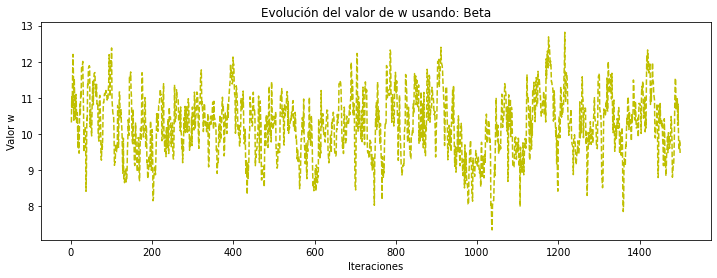

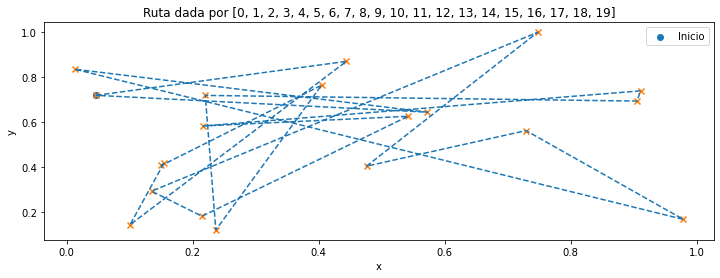

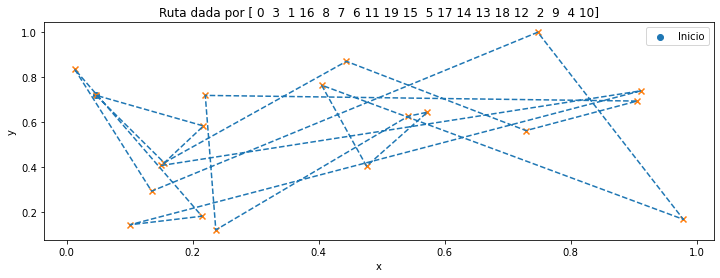

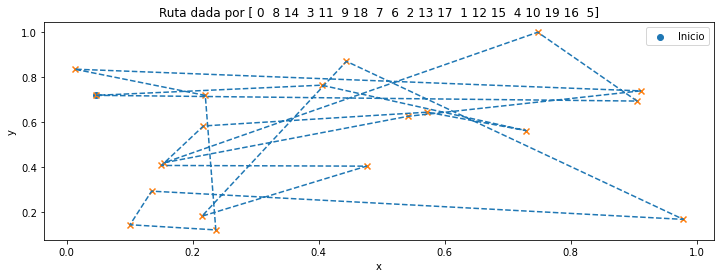

In [ ]:
plotw(w_beta, 'Beta')
pltRuta(perm_beta[0], cities)
pltRuta(perm_beta[750], cities)
pltRuta(perm_beta[-1], cities)

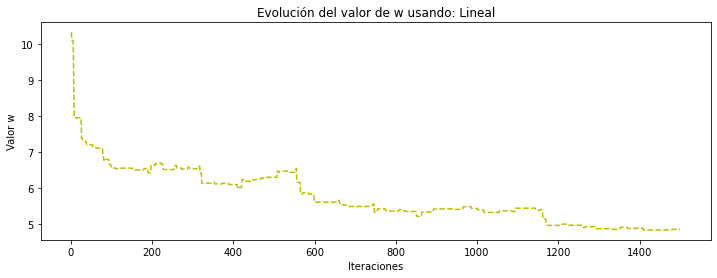

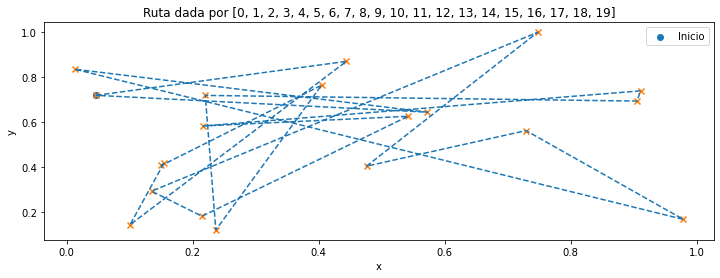

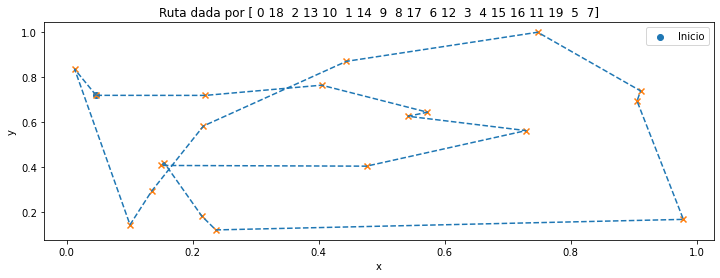

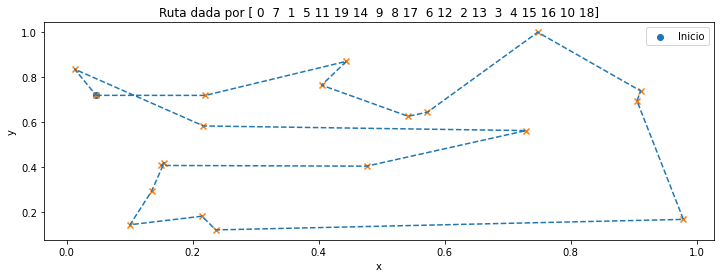

In [ ]:
plotw(w_lin, 'Lineal')
pltRuta(perm_lin[0], cities)
pltRuta(perm_lin[750], cities)
pltRuta(perm_lin[-1], cities)

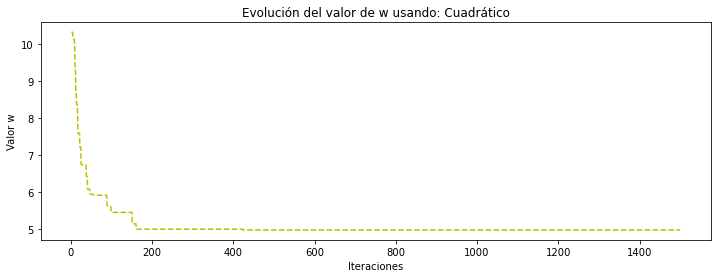

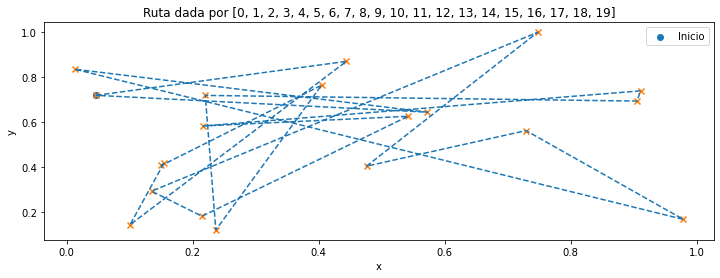

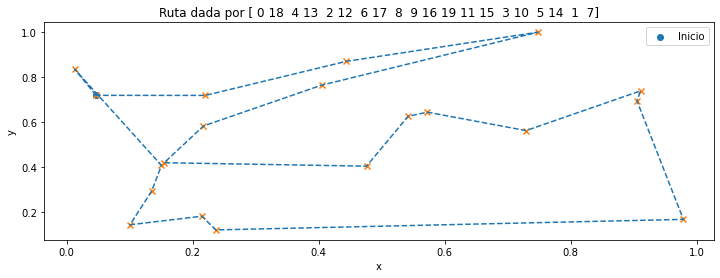

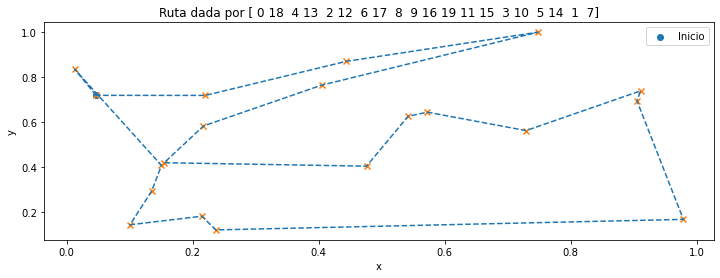

In [ ]:
plotw(w_cuad, 'Cuadrático')
pltRuta(perm_cuad[0], cities)
pltRuta(perm_cuad[750], cities)
pltRuta(perm_cuad[-1], cities)

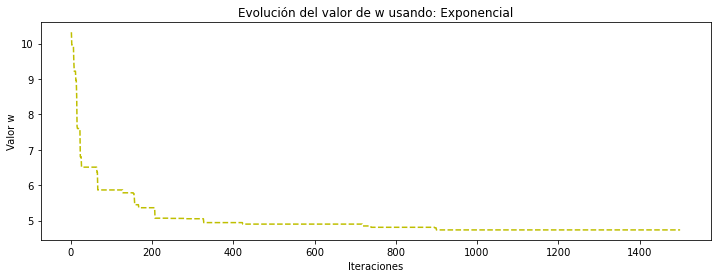

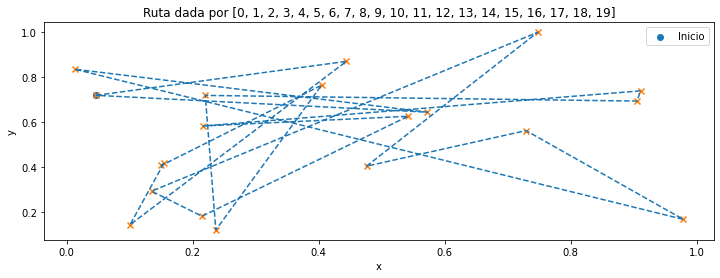

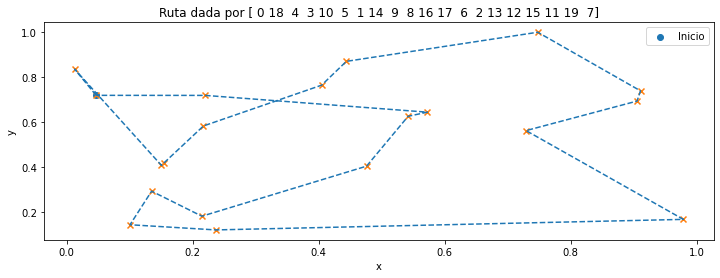

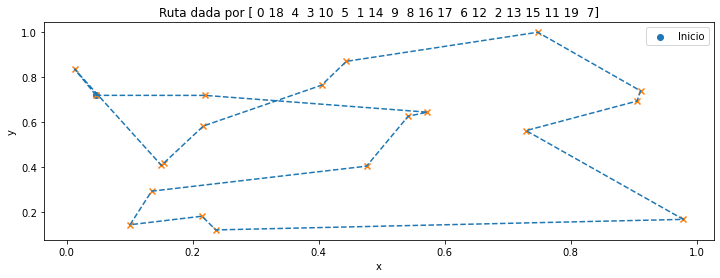

In [ ]:
plotw(w_exp, 'Exponencial')
pltRuta(perm_exp[0], cities)
pltRuta(perm_exp[750], cities)
pltRuta(perm_exp[-1], cities)

Se puede notar a partir de los gráficos que modelan la evolución de $w$ obtenidos que las temperaturas lineales, exponenciales y cuadráticas entregan recorridos que son mucho mejores que los que entrega la tempertura $\beta$, además, se puede ver que las rutas convergen a una ruta mejor de acuerdo con lo mostrado en los gráficos de Ruta.